In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

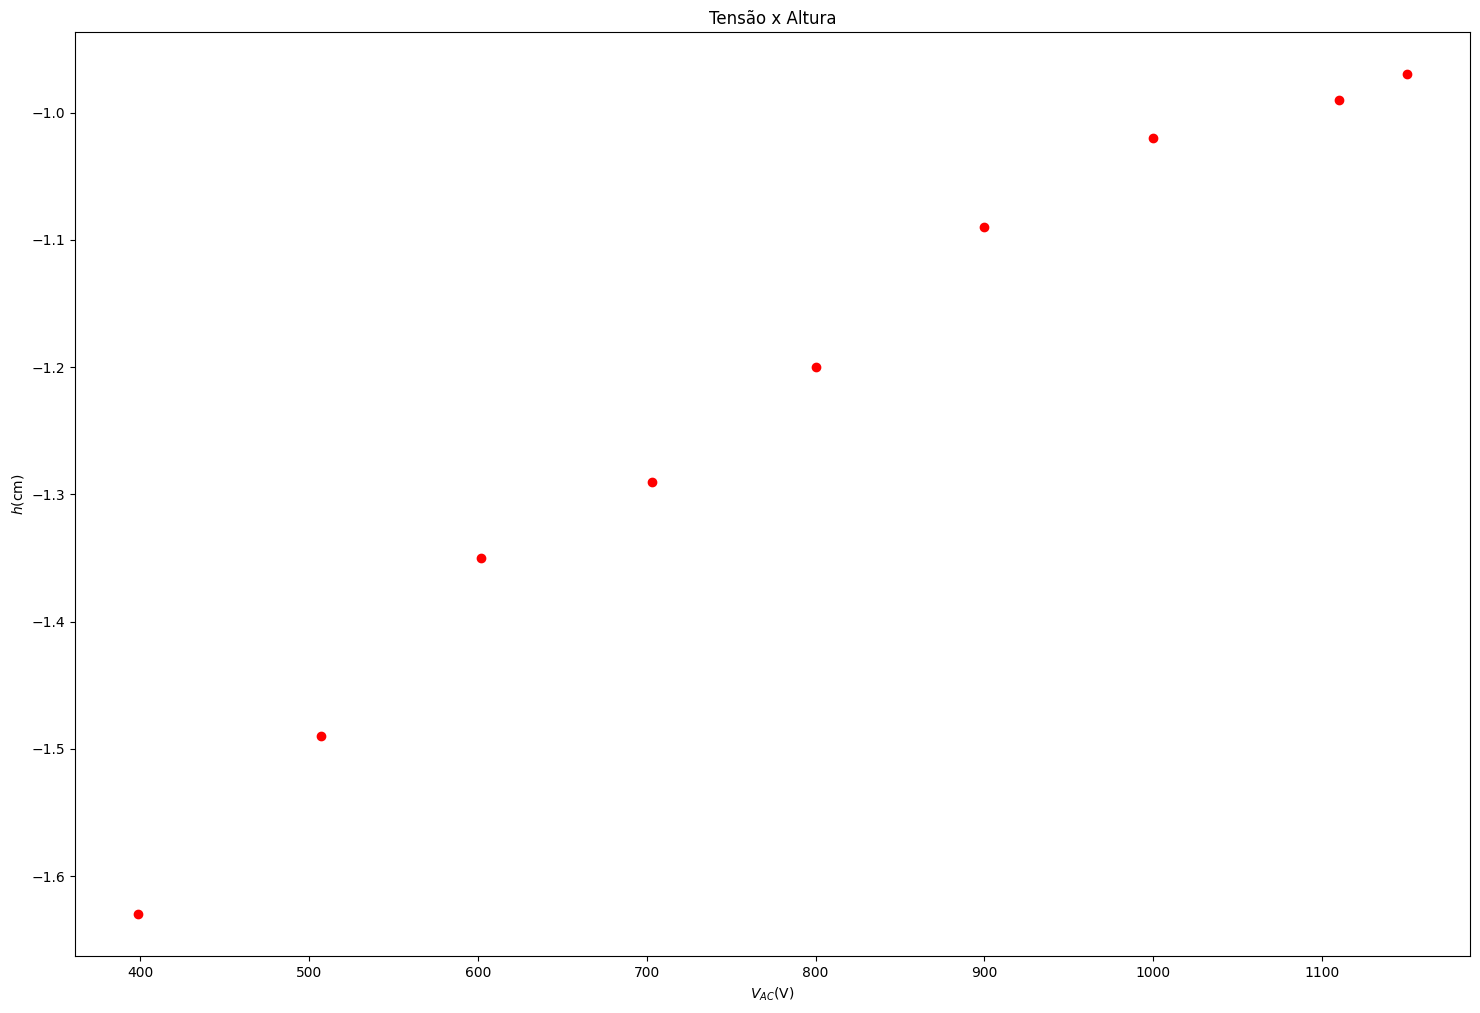

In [151]:
df = pd.read_csv('csv/testes.csv')
one=df.pop("Medida")#GET THE COLUMN THAT HAS THE NAME "MEDIDA"
df1=df.to_numpy()#TAKE ALL FLOATTING-POINT VALUES OF DATA FRAME
#print("Data Frame: ","\n",df,"\n","Pontos: ","\n",df1)


#Take data for plotting
x=[]
y=[]
for i in range(len(df1)):
    x.append(df1[i][0])
    y.append(df1[i][1])

#Settings for plotting
plt.figure(figsize=(18,12))
plt.scatter(x,y,color='red')
plt.xlabel('$V_{AC}$(V)')
plt.ylabel('$h$(cm)')
plt.title('Tensão x Altura')
plt.show()


<ipython-input-159-6db69880696a>:16: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(x, y, yerr=0.05, color='black',fmt='-o', capsize=4,ls='',label='Dados')


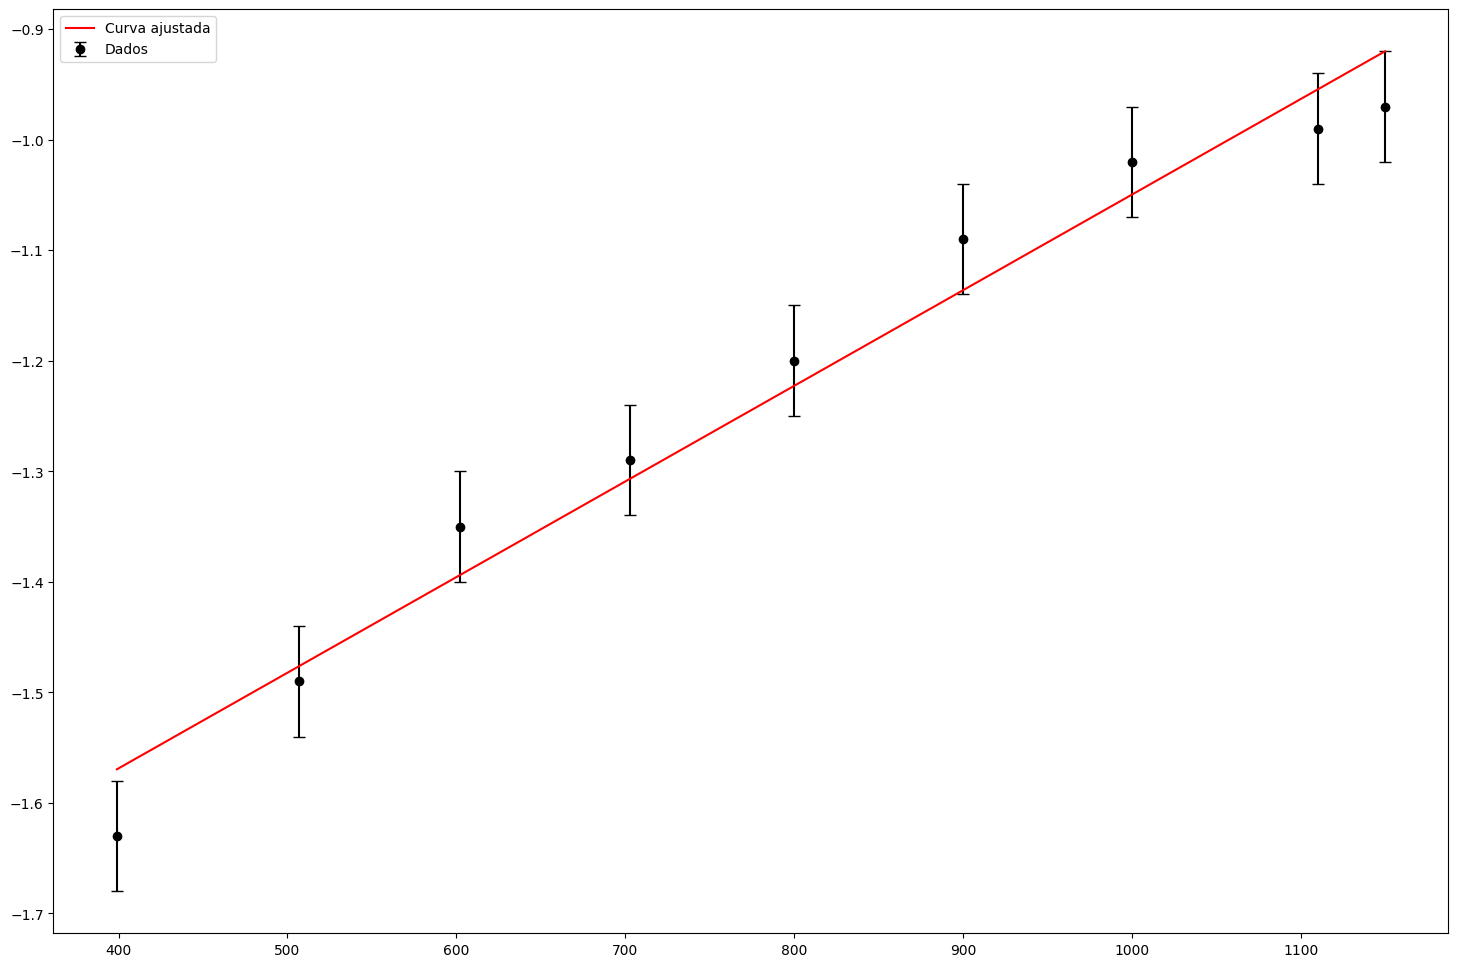

In [159]:
#Fit and Uncertainty

#Function to be fit
def funcao(x, a, b):
    return a*x+b

# Make a fit
p0 = [1, 1] # Initial Values
popt, pcov = curve_fit(funcao, x, y, p0) #popt adjust parameter 
#and pcov covariance matrix

x,y=np.array(x),np.array(y)#Convert list to array

#Settiings to plotting
plt.figure(figsize=(18,12))
plt.errorbar(x, y, yerr=0.05, color='black',fmt='-o', capsize=4,ls='',label='Dados') #Plot point and uncertainty
#plt.scatter(x, y, marker='.',color='black', label='Dados')
plt.plot(x, funcao(x, *popt), color='r', label='Curva ajustada') #Plot fit
plt.legend()
plt.show()